# CS4486 HW2

    """
    Created by CHENG Yin
    SID: 56614557
    """

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense, GRU

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
def plot_prediction(test_result, prediction, company='HSI'):
    '''
    :param test_result: real values for testing
    :param prediction: predicted values
    :return: print figure 
    '''
    
    plt.plot(test_result, color='red', label=f'Actual {company} Price')
    plt.plot(prediction, color='green', label=f'Predicted {company} Price')
    plt.title("HSI Stock Price")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")

    plt.legend()
    plt.show()

In [3]:
train_npz = np.load('train.npz')
test_npz = np.load('test.npz')
val_npz = np.load('val.npz')

In [4]:
x_train = train_npz['x'] # feature 
y_train = train_npz['y'] # label
location_train = train_npz['locations']
time_train = train_npz['times']

x_test = test_npz['x']
location_test = test_npz['locations']
time_test = test_npz['times']

x_val = val_npz['x']
y_val = val_npz['y']
location_val = val_npz['locations']
time_val = val_npz['times']

In [5]:
print(train_npz['x'].shape)
print(train_npz['y'].shape)
print(train_npz['locations'].shape)
print(train_npz['times'].shape)

(72000, 8, 49)
(72000, 1)
(72000, 2)
(72000,)


In [6]:
print(test_npz['x'].shape)
print(test_npz['locations'].shape)
print(test_npz['times'].shape)

(1600, 8, 49)
(1600, 2)
(1600,)


In [7]:
print(val_npz['x'].shape)
print(val_npz['y'].shape)
print(val_npz['locations'].shape)
print(val_npz['times'].shape)

(18000, 8, 49)
(18000, 1)
(18000, 2)
(18000,)


In [8]:
# Scaling training set

scaler = MinMaxScaler(feature_range=(0,1))

x_train = x_train.reshape(576000, 49)
x_train = scaler.fit_transform(x_train)
x_train = x_train.reshape(72000, 8, 49)

y_train = y_train.reshape(-1, 1)
y_train = scaler.fit_transform(y_train)
y_train = y_train.reshape(72000)

x_test = x_test.reshape(12800, 49)
x_test = scaler.fit_transform(x_test)
x_test = x_test.reshape(1600, 8, 49)


x_val = x_val.reshape(144000, 49)
x_val = scaler.fit_transform(x_val)
x_val = x_val.reshape(18000, 8, 49)

y_val = y_val.reshape(-1, 1)
y_val = scaler.fit_transform(y_val)
y_val = y_val.reshape(18000)

In [9]:
model = Sequential()

# First Layer
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

# Second Layer
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

# Third Layer
model.add(LSTM(units=128))
model.add(Dropout(0.2))

# Dense Layer
model.add(Dense(units=1, input_shape=(1,)))       

In [10]:
# Compiling
model.compile(optimizer='rmsprop', loss='mse')
# mse = mean_squared_error


# Training
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
2250/2250 [==============================] - 28s 11ms/step - loss: 0.0012
Epoch 2/10
2250/2250 [==============================] - 25s 11ms/step - loss: 7.8557e-04
Epoch 3/10
2250/2250 [==============================] - 25s 11ms/step - loss: 6.9955e-04
Epoch 4/10
2250/2250 [==============================] - 25s 11ms/step - loss: 6.5010e-04
Epoch 5/10
2250/2250 [==============================] - 25s 11ms/step - loss: 6.1143e-04
Epoch 6/10
2250/2250 [==============================] - 26s 11ms/step - loss: 5.9176e-04
Epoch 7/10
2250/2250 [==============================] - 25s 11ms/step - loss: 5.6871e-04
Epoch 8/10
2250/2250 [==============================] - 25s 11ms/step - loss: 5.5687e-04
Epoch 9/10
2250/2250 [==============================] - 25s 11ms/step - loss: 5.4189e-04
Epoch 10/10
2250/2250 [==============================] - 25s 11ms/step - loss: 5.2581e-04


In [11]:
predicted_val = model.predict(x_test)
predicted_val = scaler.inverse_transform(predicted_val)
predicted_val.shape

(1600, 1)

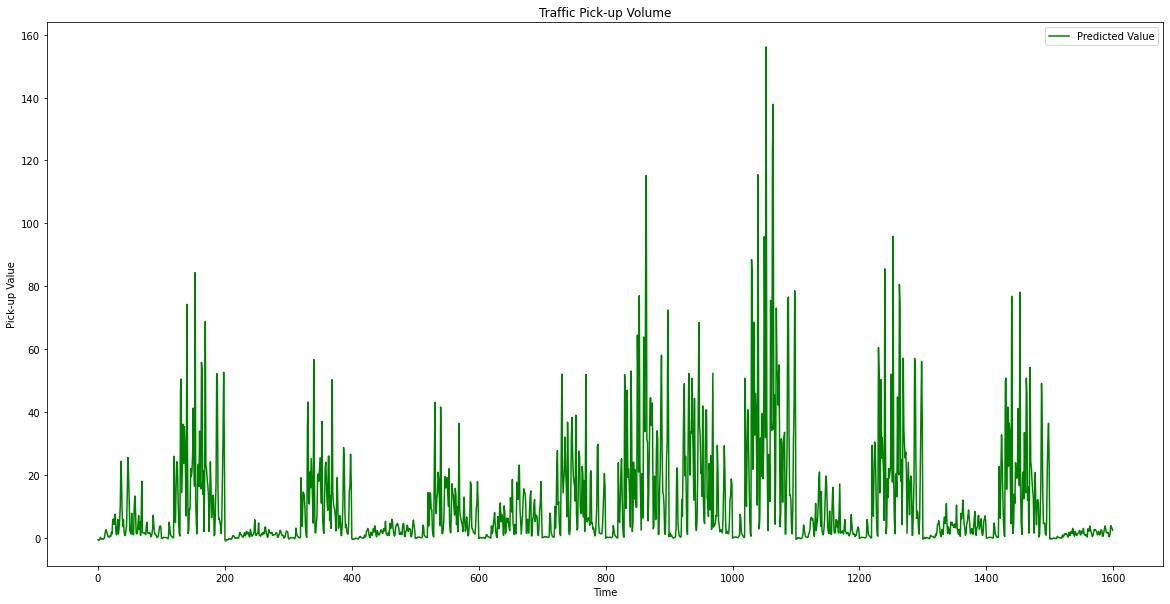

In [12]:
# Predicted Value
plt.plot(predicted_val, color='green', label=f'Predicted Value')
plt.title("Traffic Pick-up Volume")
plt.xlabel("Time")
plt.ylabel("Pick-up Value")

plt.legend()
plt.show()

In [13]:
model_gru = Sequential()

model_gru.add(GRU(50, return_sequences=True, activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1))

model_gru.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9), loss='mse')

model_gru.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0026
Epoch 2/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 3/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0015
Epoch 4/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0014
Epoch 5/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0013
Epoch 6/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0013
Epoch 7/10
2250/2250 [==============================] - 9s 4ms/step - loss: 0.0012
Epoch 8/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0012
Epoch 9/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0011
Epoch 10/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0011


In [14]:
GRU_predicted_val = model_gru.predict(x_test)
GRU_predicted_val = scaler.inverse_transform(GRU_predicted_val)

GRU_predicted_val.shape

(1600, 1)

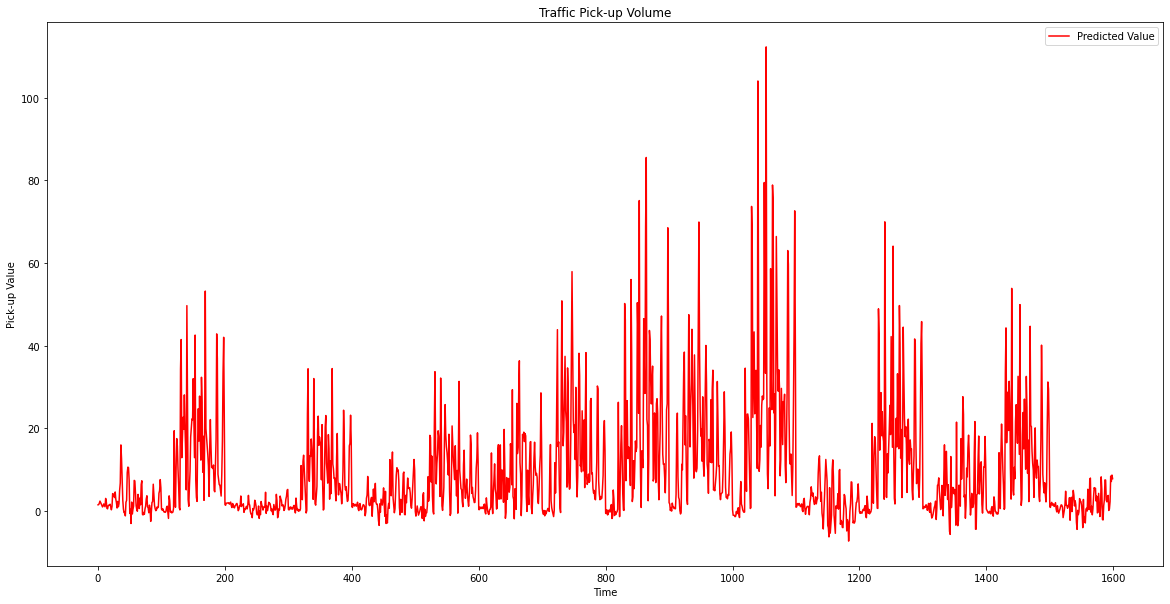

In [15]:
plt.plot(GRU_predicted_val, color='red', label=f'Predicted Value')
plt.title("Traffic Pick-up Volume")
plt.xlabel("Time")
plt.ylabel("Pick-up Value")

plt.legend()
plt.show()